In [2]:
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if "google.colab" in sys.modules:
    from google.colab import drive
    drive.mount("/content/drive")
    %cd "/content/drive/MyDrive/Python/Bath University/RL1_CW/Louie"
    !pip install swig
    !pip install gymnasium[box2d]

# Unpack DDPG Data

In [9]:
from DDPG.Networks import Critic as DDPGCritic, Actor as DDPGActor

ddpg_root = "DDPG/outputs/"

ddpg_untrained_actor = DDPGActor()
ddpg_trained_actor = DDPGActor()
ddpg_trained_actor.load_state_dict(torch.load(ddpg_root + "actor_network.pth", map_location=device))

ddpg_untrained_critic = DDPGCritic()
ddpg_trained_critic = DDPGCritic()
ddpg_trained_critic.load_state_dict(torch.load(ddpg_root + "critic_network.pth", map_location=device))

with open(ddpg_root + "episode_rewards.pkl", "rb") as f:
    ddpg_episode_rewards = pickle.load(f)
    
with open(ddpg_root + "episode_run_times.pkl", "rb") as f:
    ddpg_episode_run_times = pickle.load(f)
    
with open(ddpg_root + "episode_step_counts.pkl", "rb") as f:
    ddpg_episode_step_counts = pickle.load(f)
    
with open(ddpg_root + "settings.pkl", "rb") as f:
    ddpg_settings = pickle.load(f)

# Unpack TD3 Data

In [5]:
from TD3.Networks import Critic as TD3Critic, Actor as TD3Actor
    

td3_stage1_root = "TD3/outputs/stage 1/"

td3_untrained_actor = TD3Actor()
td3_stage1_actor = TD3Actor()
td3_stage1_actor.load_state_dict(torch.load(td3_stage1_root + "actor_network.pth", map_location=device))

td3_untrained_critic1 = TD3Critic()
td3_stage1_critic1 = TD3Critic()
td3_stage1_critic1.load_state_dict(torch.load(td3_stage1_root + "critic_network1.pth", map_location=device))

td3_untrained_critic2 = TD3Critic()
td3_stage1_critic2 = TD3Critic()
td3_stage1_critic2.load_state_dict(torch.load(td3_stage1_root + "critic_network2.pth", map_location=device))

with open(td3_stage1_root + "episode_rewards.pkl", "rb") as f:
    td3_stage1_episode_rewards = pickle.load(f)
    
with open(td3_stage1_root + "episode_run_times.pkl", "rb") as f:
    td3_stage1_episode_run_times = pickle.load(f)
    
with open(td3_stage1_root + "episode_step_counts.pkl", "rb") as f:
    td3_stage1_episode_step_counts = pickle.load(f)
    
with open(td3_stage1_root + "settings.pkl", "rb") as f:
    td3_stage1_settings = pickle.load(f)
    
    
td3_stage2_root = "TD3/outputs/stage 2/"

td3_stage2_actor = TD3Actor()
td3_stage2_actor.load_state_dict(torch.load(td3_stage2_root + "actor_network.pth", map_location=device))

td3_stage2_critic1 = TD3Critic()
td3_stage2_critic1.load_state_dict(torch.load(td3_stage2_root + "critic_network1.pth", map_location=device))

td3_stage2_critic2 = TD3Critic()
td3_stage2_critic2.load_state_dict(torch.load(td3_stage2_root + "critic_network2.pth", map_location=device))

with open(td3_stage2_root + "episode_rewards.pkl", "rb") as f:
    td3_stage2_episode_rewards = pickle.load(f)
    
with open(td3_stage2_root + "episode_run_times.pkl", "rb") as f:
    td3_stage2_episode_run_times = pickle.load(f)
    
with open(td3_stage2_root + "episode_step_counts.pkl", "rb") as f:
    td3_stage2_episode_step_counts = pickle.load(f)
    
with open(td3_stage2_root + "settings.pkl", "rb") as f:
    td3_stage2_settings = pickle.load(f)
    
    
td3_stage3_root = "TD3/outputs/stage 3/"

td3_stage3_actor = TD3Actor()
td3_stage3_actor.load_state_dict(torch.load(td3_stage3_root + "actor_network.pth", map_location=device))

td3_stage3_critic1 = TD3Critic()
td3_stage3_critic1.load_state_dict(torch.load(td3_stage3_root + "critic_network1.pth", map_location=device))

td3_stage3_critic2 = TD3Critic()
td3_stage3_critic2.load_state_dict(torch.load(td3_stage3_root + "critic_network2.pth", map_location=device))

with open(td3_stage3_root + "episode_rewards.pkl", "rb") as f:
    td3_stage3_episode_rewards = pickle.load(f)
    
with open(td3_stage3_root + "episode_run_times.pkl", "rb") as f:
    td3_stage3_episode_run_times = pickle.load(f)
    
with open(td3_stage3_root + "episode_step_counts.pkl", "rb") as f:
    td3_stage3_episode_step_counts = pickle.load(f)
    
with open(td3_stage3_root + "settings.pkl", "rb") as f:
    td3_stage3_settings = pickle.load(f)

# Unpack SAC Data

In [6]:
from SAC.Networks import Critic as SACCritic, Actor as SACActor
    

sac_stage1_root = "SAC/outputs/stage 1/"

sac_untrained_actor = SACActor()
sac_stage1_actor = SACActor()
sac_stage1_actor.load_state_dict(torch.load(sac_stage1_root + "actor_network.pth", map_location=device))

sac_untrained_critic1 = SACCritic()
sac_stage1_critic1 = SACCritic()
sac_stage1_critic1.load_state_dict(torch.load(sac_stage1_root + "critic_network1.pth", map_location=device))

sac_untrained_critic2 = SACCritic()
sac_stage1_critic2 = SACCritic()
sac_stage1_critic2.load_state_dict(torch.load(sac_stage1_root + "critic_network2.pth", map_location=device))

with open(sac_stage1_root + "episode_alphas.pkl", "rb") as f:
    sac_stage1_episode_alphas = pickle.load(f)

with open(sac_stage1_root + "episode_rewards.pkl", "rb") as f:
    sac_stage1_episode_rewards = pickle.load(f)
    
with open(sac_stage1_root + "episode_run_times.pkl", "rb") as f:
    sac_stage1_episode_run_times = pickle.load(f)
    
with open(sac_stage1_root + "episode_step_counts.pkl", "rb") as f:
    sac_stage1_episode_step_counts = pickle.load(f)
    
with open(sac_stage1_root + "settings.pkl", "rb") as f:
    sac_stage1_settings = pickle.load(f)
    
    
sac_stage2_root = "SAC/outputs/stage 2/"

sac_stage2_actor = SACActor()
sac_stage2_actor.load_state_dict(torch.load(sac_stage2_root + "actor_network.pth", map_location=device))

sac_stage2_critic1 = SACCritic()
sac_stage2_critic1.load_state_dict(torch.load(sac_stage2_root + "critic_network1.pth", map_location=device))

sac_stage2_critic2 = SACCritic()
sac_stage2_critic2.load_state_dict(torch.load(sac_stage2_root + "critic_network2.pth", map_location=device))

with open(sac_stage2_root + "episode_alphas.pkl", "rb") as f:
    sac_stage2_episode_alphas = pickle.load(f)

with open(sac_stage2_root + "episode_rewards.pkl", "rb") as f:
    sac_stage2_episode_rewards = pickle.load(f)
    
with open(sac_stage2_root + "episode_run_times.pkl", "rb") as f:
    sac_stage2_episode_run_times = pickle.load(f)
    
with open(sac_stage2_root + "episode_step_counts.pkl", "rb") as f:
    sac_stage2_episode_step_counts = pickle.load(f)
    
with open(sac_stage2_root + "settings.pkl", "rb") as f:
    sac_stage2_settings = pickle.load(f)
    
    
sac_stage3_root = "SAC/outputs/stage 3/"

sac_stage3_actor = SACActor()
sac_stage3_actor.load_state_dict(torch.load(sac_stage3_root + "actor_network.pth", map_location=device))

sac_stage3_critic1 = SACCritic()
sac_stage3_critic1.load_state_dict(torch.load(sac_stage3_root + "critic_network1.pth", map_location=device))

sac_stage3_critic2 = SACCritic()
sac_stage3_critic2.load_state_dict(torch.load(sac_stage3_root + "critic_network2.pth", map_location=device))

with open(sac_stage3_root + "episode_alphas.pkl", "rb") as f:
    sac_stage3_episode_alphas = pickle.load(f)

with open(sac_stage3_root + "episode_rewards.pkl", "rb") as f:
    sac_stage3_episode_rewards = pickle.load(f)
    
with open(sac_stage3_root + "episode_run_times.pkl", "rb") as f:
    sac_stage3_episode_run_times = pickle.load(f)
    
with open(sac_stage3_root + "episode_step_counts.pkl", "rb") as f:
    sac_stage3_episode_step_counts = pickle.load(f)
    
with open(sac_stage3_root + "settings.pkl", "rb") as f:
    sac_stage3_settings = pickle.load(f)
    
    
sac_stage4_root = "SAC/outputs/stage 4/"

sac_stage4_actor = SACActor()
sac_stage4_actor.load_state_dict(torch.load(sac_stage4_root + "actor_network.pth", map_location=device))

sac_stage4_critic1 = SACCritic()
sac_stage4_critic1.load_state_dict(torch.load(sac_stage4_root + "critic_network1.pth", map_location=device))

sac_stage4_critic2 = SACCritic()
sac_stage4_critic2.load_state_dict(torch.load(sac_stage4_root + "critic_network2.pth", map_location=device))

with open(sac_stage4_root + "episode_alphas.pkl", "rb") as f:
    sac_stage4_episode_alphas = pickle.load(f)

with open(sac_stage4_root + "episode_rewards.pkl", "rb") as f:
    sac_stage4_episode_rewards = pickle.load(f)
    
with open(sac_stage4_root + "episode_run_times.pkl", "rb") as f:
    sac_stage4_episode_run_times = pickle.load(f)
    
with open(sac_stage4_root + "episode_step_counts.pkl", "rb") as f:
    sac_stage4_episode_step_counts = pickle.load(f)
    
with open(sac_stage4_root + "settings.pkl", "rb") as f:
    sac_stage4_settings = pickle.load(f)

# TD3 Videos

In [10]:
from TD3.Agent import TD3Agent

td3_untrained_agent = TD3Agent(td3_untrained_critic1,
                               td3_untrained_critic2,
                               td3_untrained_actor,
                               device=torch.device("cpu"),
                               hardcore=False)

td3_untrained_agent.test_episode(video=False)


========TEST RUN========
Reward: -123.24 - Step Count: 123 - Run Time: 2.54s



In [11]:
td3_stage1_agent = TD3Agent(td3_stage1_critic1,
                            td3_stage1_critic2,
                            td3_stage1_actor,
                            device=torch.device("cpu"),
                            hardcore=False)

td3_stage1_agent.test_episode(video=False)


========TEST RUN========
Reward: 300.62 - Step Count: 868 - Run Time: 18.13s



In [12]:
td3_stage2_agent = TD3Agent(td3_stage2_critic1,
                            td3_stage2_critic2,
                            td3_stage2_actor,
                            device=torch.device("cpu"),
                            hardcore=False)

td3_stage2_agent.test_episode(video=False)


========TEST RUN========
Reward: 309.46 - Step Count: 789 - Run Time: 17.24s



In [15]:
td3_stage3_agent = TD3Agent(td3_stage3_critic1,
                            td3_stage3_critic2,
                            td3_stage3_actor,
                            device=torch.device("cpu"),
                            hardcore=True)

td3_stage3_agent.test_episode(video=False)


========TEST RUN========
Reward: -14.66 - Step Count: 1600 - Run Time: 32.85s



# TD3 Plots

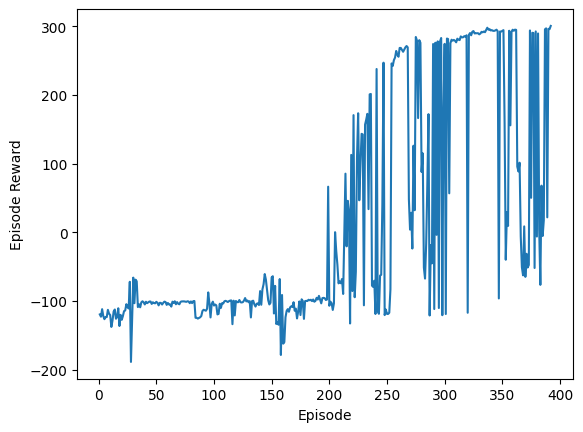

In [19]:
td3_stage1_episodes = np.arange(1, len(td3_stage1_episode_rewards) + 1)

plt.plot(td3_stage1_episodes, td3_stage1_episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.show()

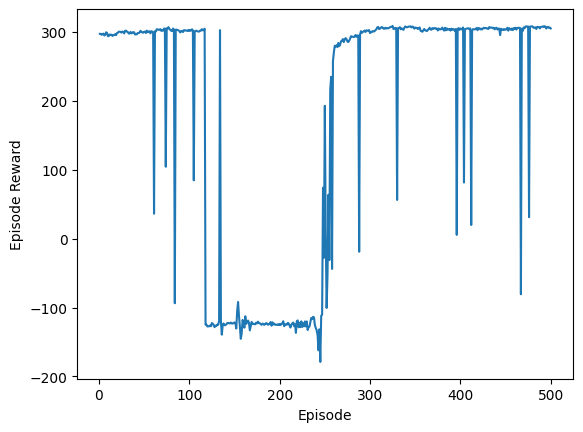

In [21]:
td3_stage2_episodes = np.arange(1, len(td3_stage2_episode_rewards) + 1)

plt.plot(td3_stage2_episodes, td3_stage2_episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.show()

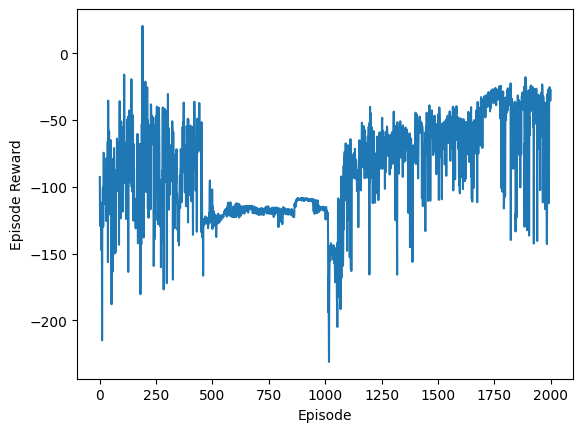

In [22]:
td3_stage3_episodes = np.arange(1, len(td3_stage3_episode_rewards) + 1)

plt.plot(td3_stage3_episodes, td3_stage3_episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.show()

# SAC Videos

In [5]:
from SAC.Agent import SACAgent

sac_untrained_agent = SACAgent(sac_untrained_critic1,
                           sac_untrained_critic2,
                           sac_untrained_actor,
                           device=torch.device("cpu"),
                           hardcore=False)

sac_untrained_agent.test_episode(video=False)


========TEST RUN========
Reward: -89.90 - Step Count: 1600 - Run Time: 33.97s



In [9]:
sac_stage1_agent = SACAgent(sac_stage1_critic1,
                           sac_stage1_critic2,
                           sac_stage1_actor,
                           device=torch.device("cpu"),
                           hardcore=False)

sac_stage1_agent.test_episode(video=False)

NameError: name 'SACAgent' is not defined

In [7]:
sac_stage2_agent = SACAgent(sac_stage2_critic1,
                            sac_stage2_critic2,
                            sac_stage2_actor,
                            device=torch.device("cpu"),
                            hardcore=False)

sac_stage2_agent.test_episode(video=False)


========TEST RUN========
Reward: 320.33 - Step Count: 704 - Run Time: 14.52s



In [9]:
sac_stage3_agent = SACAgent(sac_stage3_critic1,
                            sac_stage3_critic2,
                            sac_stage3_actor,
                            device=torch.device("cpu"),
                            hardcore=True)

sac_stage3_agent.test_episode(video=False)


========TEST RUN========
Reward: 290.37 - Step Count: 1114 - Run Time: 22.80s



In [22]:
sac_stage4_agent = SACAgent(sac_stage4_critic1,
                            sac_stage4_critic2,
                            sac_stage4_actor,
                            device=torch.device("cpu"),
                            hardcore=True)

sac_stage4_agent.test_episode(video=False)


========TEST RUN========
Reward: 289.57 - Step Count: 1090 - Run Time: 22.34s



# SAC Plots

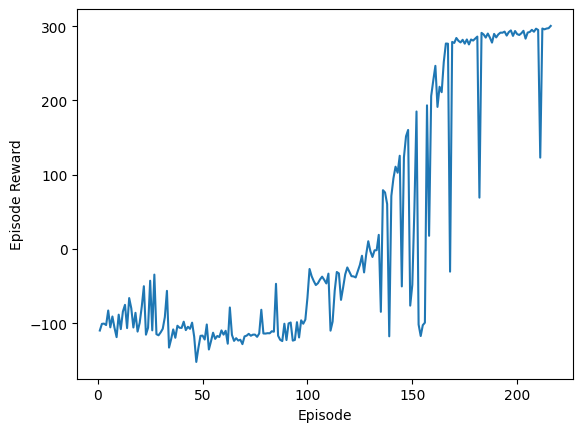

In [23]:
sac_stage1_episodes = np.arange(1, len(sac_stage1_episode_rewards) + 1)

plt.plot(sac_stage1_episodes, sac_stage1_episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.show()

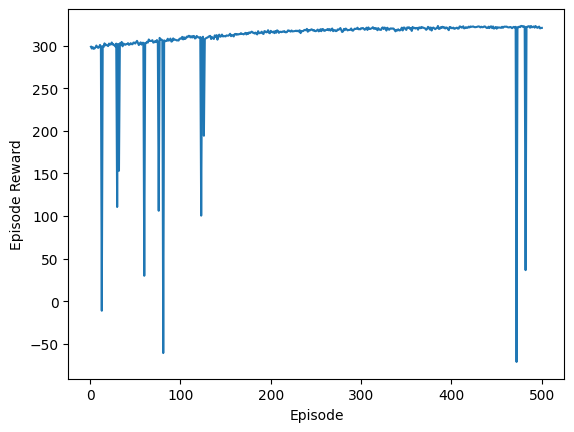

In [24]:
sac_stage2_episodes = np.arange(1, len(sac_stage2_episode_rewards) + 1)

plt.plot(sac_stage2_episodes, sac_stage2_episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.show()

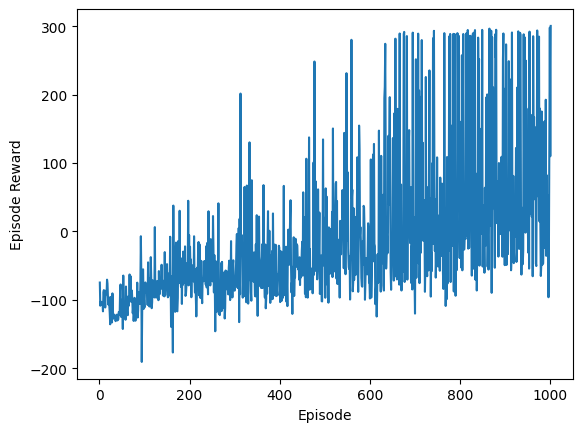

In [25]:
sac_stage3_episodes = np.arange(1, len(sac_stage3_episode_rewards) + 1)

plt.plot(sac_stage3_episodes, sac_stage3_episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.show()

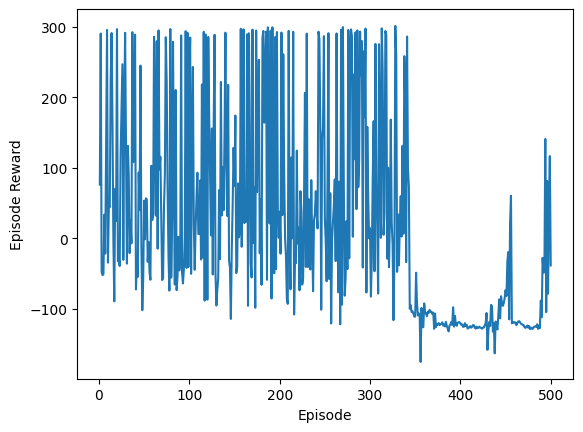

In [26]:
sac_stage4_episodes = np.arange(1, len(sac_stage4_episode_rewards) + 1)

plt.plot(sac_stage4_episodes, sac_stage4_episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.show()